## Final Project 
#### Exploring Music Notation Reconstruction Using Machine Learning

* Philip Kim, 
* Snehal Patare, 
* Isaiah Sherfick

In [28]:
# Importing required libraries
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import cv2
import pandas as pd 

In [40]:
# Setting up labels and loading images from the dataset
Dataset_path = ".\images"
Categories = ["1-8-Time","2-2-Time","2-4-Time","2-8-Time","3-4-Time","3-8-Time","4-2-Time","4-4-Time","4-8-Time","5-4-Time","5-8-Time","6-4-Time",
              "6-8-Time","7-4-Time","8-8-Time","9-8-Time","12-8-Time","Accent","Arpeggio","Barline","Beam","Brace",
              "Breath-Mark","Breve","C-Clef","Chord","Coda","Coda-Square","Common-Time","Cut-Time","Dot","Dotted-Horizontal-Spanner",
              "Double-Flat","Double-Sharp","Double-Whole-Rest","Eighth-Grace-Note","Eighth-Note","Eighth-Rest","F-Clef","Fermata","Flat","G-Clef",
              "Glissando","Hairpin-Crescendo","Hairpin-Decrescendo","Half-Note","Horizontal-Spanner","Letter-F","Letter-M","Letter-P","Letter-S","Letter-Z","Marcato",
              "Mordent","Multiple-Eighth-Notes","Multiple-Half-Notes","Multiple-Quarter-Notes","Multiple-Sixteenth-Notes","Natural","Onehundred-Twenty-Eight-Note",
              "Onehundred-Twenty-Eight-Rest","Other","Quarter-Note","Quarter-Rest","Repeat-Measure","Segno","Sharp","Sixteenth-Note","Sixteenth-Rest",
              "Sixty-Four-Note","Sixty-Four-Rest","Staccatissimo","Stopped","Tenuto","Thirty-Two-Note","Thirty-Two-Rest","Tie-Slur","Trill","Trill-Wobble","Tuplet",
              "Turn","Whole-Half-Rest","Whole-Note","Volta"]
for category in Categories:
    path = os.path.join(Dataset_path,category) # Path to labels

### Build model

In [60]:
import pandas as pd 
import tensorflow as tf
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import keras

In [42]:
# 48 Layers model for training
# Converting image into 256 x 256 image size
base_model = InceptionV3(input_shape=(256,256,3), include_top=False)

In [43]:
for layer in base_model.layers:
    layer.trainable = False

In [44]:
# Adding Dense and Flatten layers
# Sigmoid as activation function
X = Flatten()(base_model.output)
X = Dense(units = 84, activation = 'sigmoid')(X)

model = Model(base_model.input, X)

#Compile 
model.compile(optimizer='adam', loss = keras.losses.binary_crossentropy, metrics = ['accuracy'])

model.summary()



Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 127, 127, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 127, 127, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                           

 conv2d_275 (Conv2D)            (None, 6, 6, 384)    442368      ['activation_274[0][0]']         
                                                                                                  
 conv2d_276 (Conv2D)            (None, 6, 6, 384)    442368      ['activation_274[0][0]']         
                                                                                                  
 conv2d_279 (Conv2D)            (None, 6, 6, 384)    442368      ['activation_278[0][0]']         
                                                                                                  
 conv2d_280 (Conv2D)            (None, 6, 6, 384)    442368      ['activation_278[0][0]']         
                                                                                                  
 average_pooling2d_26 (AverageP  (None, 6, 6, 2048)  0           ['mixed9[0][0]']                 
 ooling2D)                                                                                        
          

## Preprocess data 

In [45]:
# ImageDataGenerator used for image rotation and tilting for more better approach
train_datagen = ImageDataGenerator(featurewise_center = True, 
                                  rotation_range = 0.4, 
                                  width_shift_range = 0.3, 
                                  horizontal_flip = True, 
                                  preprocessing_function= preprocess_input, 
                                  zoom_range = 0.4,
                                  shear_range = 0.4 )
train_data = train_datagen.flow_from_directory(directory="./images", 
                                               target_size = (256,256),
                                               batch_size = 36)

Found 80405 images belonging to 84 classes.


In [70]:
# Checking for labels and its values
indices = train_data.class_indices
for i, val in enumerate(indices):
    if i==41:
        print(val)


G-Clef


In [47]:
# Visualizing data 
t_img, label = train_data.next()
t_img.shape

(36, 256, 256, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


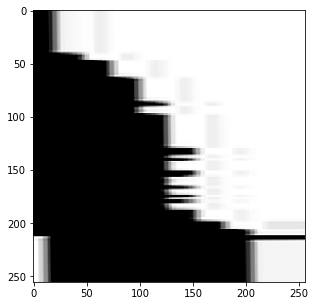

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


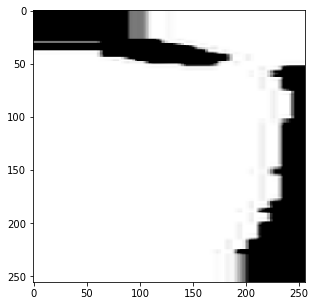

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


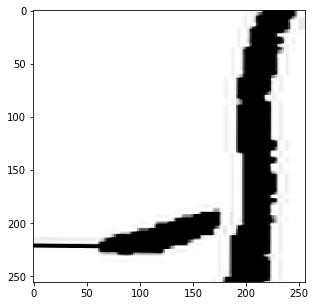

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


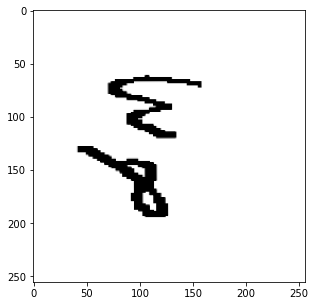

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


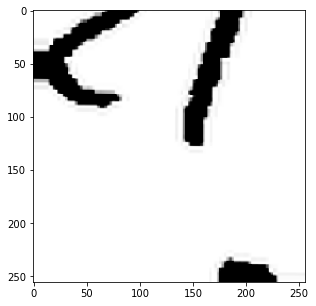

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


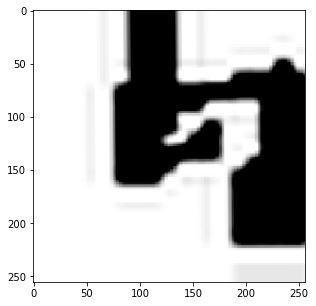

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


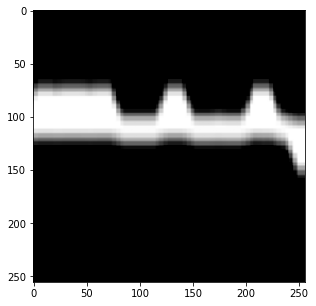

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


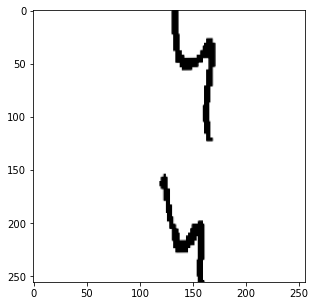

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


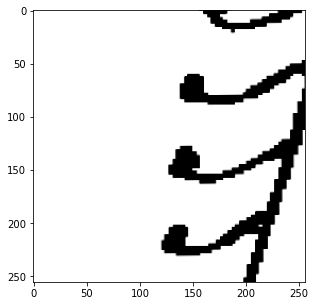

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


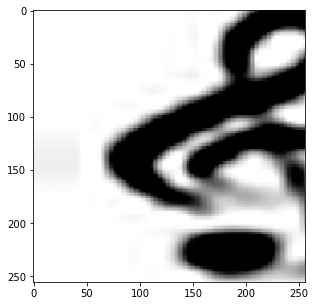

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


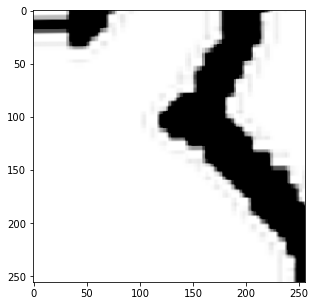

In [48]:
# Plotting for visualizing the images
def plotimg(img_arr,label):
    for i,img in enumerate(img_arr):
        if i<11:
            plt.figure(figsize=(5,5))
            plt.imshow(img)
            plt.show()
plotimg(t_img,label)

In [49]:
# Seting the early stop and save model in model.h5 
from keras.callbacks import ModelCheckpoint, EarlyStopping 
mc = ModelCheckpoint(filepath = "./model.h5", monitor = "accuracy", verbose = 1, save_best_only = True)
es = EarlyStopping(monitor = "accuracy", min_delta = 0.01, patience = 5, verbose = 1)

cb = [mc,es]

In [52]:
# Train model
trainmodel = model.fit_generator(train_data, steps_per_epoch = 10, epochs = 40, callbacks = cb )

<ipython-input-52-90cb7bf7eb43>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  trainmodel = model.fit_generator(train_data, steps_per_epoch = 10, epochs = 40, callbacks = cb )


Epoch 1/40
10/10 [==============================] - ETA: 0s - loss: 0.4442 - accuracy: 0.3250
Epoch 00001: accuracy improved from 0.16667 to 0.32500, saving model to .\model.h5
10/10 [==============================] - 35s 3s/step - loss: 0.4442 - accuracy: 0.3250
Epoch 2/40
10/10 [==============================] - ETA: 0s - loss: 0.3369 - accuracy: 0.3750
Epoch 00002: accuracy improved from 0.32500 to 0.37500, saving model to .\model.h5
10/10 [==============================] - 35s 3s/step - loss: 0.3369 - accuracy: 0.3750
Epoch 3/40
10/10 [==============================] - ETA: 0s - loss: 0.2493 - accuracy: 0.4500
Epoch 00003: accuracy improved from 0.37500 to 0.45000, saving model to .\model.h5
10/10 [==============================] - 35s 3s/step - loss: 0.2493 - accuracy: 0.4500
Epoch 4/40
10/10 [==============================] - ETA: 0s - loss: 0.1954 - accuracy: 0.4444
Epoch 00004: accuracy did not improve from 0.45000
10/10 [==============================] - 34s 3s/step - loss: 0.

In [54]:
# Load saved model
from keras.models import load_model
model=load_model("./model.h5")

In [55]:
h = trainmodel.history
h.keys()

dict_keys(['loss', 'accuracy'])

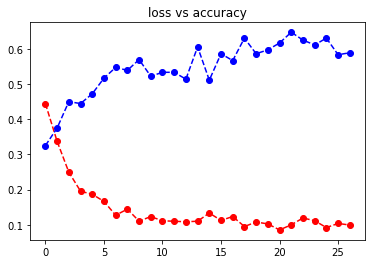

In [59]:
# Plotting loss and accuracy function vs epochs
plt.plot(h['loss'],'go--', c= "red")
plt.plot(h['accuracy'],'go--', c= "blue")

plt.title("loss vs accuracy")
plt.show()

In [72]:
# Prediting the output from the saved model
path = "./test/G-Clef/45-9_3.png"

img =load_img(path,target_size=(256,256))

i=img_to_array(img)
i=preprocess_input(i)
input_arr = np.array([i])
input_arr.shape
pred = np.argmax(model.predict(input_arr))
for i, val in enumerate(indices):
    if i==pred:
        print("The music caharacter detected is",val)

                    

The music caharacter detected is G-Clef
